# Statistical Inference Using Simulation
## Statistical Computing Notebook Week 4

*Julyver Tolentino* | *Mapúa University* | *DS122L*

### About Statistical Simulations

Typically, Statistical problems where collection of data is infeasible or repeating the task multiple times that causes huge time consumption often lead the path of simulating them. So long as the behavior, distribution and the characteristics of data are known beforehand, simulation is possible for addressing Statistical-related problems.

Before performing any tests, the model distribution must be assessed first and identifying the correct type of distribution in a given case is crucial to provide an accurate insight to a given task.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# For reproducibility
np.random.seed(9453)

### Discrete Random Variables

The following are the common types of discrete distributions and its corresponding `python` simulation model

#### Binomial Distribution

<h3>$$P_x = \binom{n}{k} p^{k}(1-p)^{n-k}$$</h3>

In [18]:
NUM_SIMULATIONS = 100  # The larger, the more accurate the results

NUM_ATTEMPTS = 60        # n
NUM_SUCCESS = 17         # k
PROB_SUCCESS = 0.25      # p

In [19]:
binom_results = np.random.binomial(n=NUM_ATTEMPTS, p=PROB_SUCCESS, size=NUM_SIMULATIONS)

In [20]:
# Shows the number of successes per simulation
binom_results

array([10, 18, 13, 13, 12, 17, 14, 19, 21, 18, 15, 15, 15, 18, 15, 16, 13,
       14, 15, 22, 15, 19, 12, 14, 11, 22, 13, 17, 12, 19, 22, 12, 16, 16,
       15, 18, 12, 17, 14, 20, 14, 13, 18, 18, 15,  9, 18, 18, 14, 17, 14,
       16,  9, 13, 11, 14, 12,  9, 19, 10, 10, 17, 12, 15, 17, 11, 16, 22,
       17, 14, 14, 17, 10, 18, 14, 18, 17, 14, 14, 13, 16, 14, 11, 14, 14,
       23, 12, 20, 18, 14, 18, 15, 14, 12,  9, 20, 10, 17, 11, 13])

In [21]:
binom_is_bound = binom_results <= NUM_SUCCESS  ## [..,...,..] <= 17

In [22]:
binom_is_bound

array([ True, False,  True,  True,  True,  True,  True, False, False,
       False,  True,  True,  True, False,  True,  True,  True,  True,
        True, False,  True, False,  True,  True,  True, False,  True,
        True,  True, False, False,  True,  True,  True,  True, False,
        True,  True,  True, False,  True,  True, False, False,  True,
        True, False, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True, False,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True, False, False,  True,
       False,  True,  True,  True,  True, False,  True,  True,  True,
        True])

In [23]:
binom_is_bound.mean()

0.75

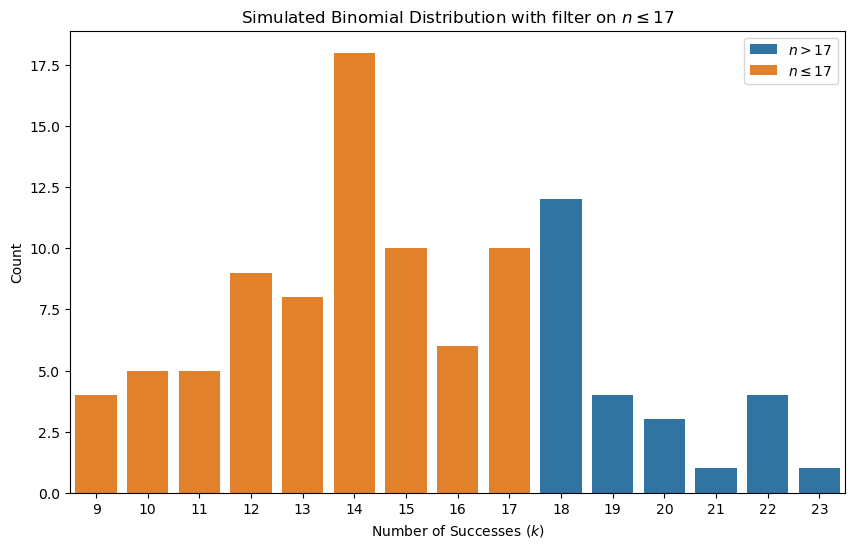

In [26]:
fig, ax = plt.subplots(figsize=(10,6))

sns.countplot(x=binom_results, hue=binom_is_bound, dodge=False)

ax.set_xlabel('Number of Successes $(k)$')
ax.set_ylabel('Count')
ax.set_title(f'Simulated Binomial Distribution with filter on $n\leq ${NUM_SUCCESS}')

ax.legend([f'$n>${NUM_SUCCESS}',f'$n\leq${NUM_SUCCESS}'])

plt.show()

#### Geometric Distribution

<h3>$$P_x = (1-p)^{k-1}p$$</h3>

In [10]:
NUM_SIMULATIONS = 10000  # The larger, the more accurate the results

ATTEMPT_NUM_CHECK = 12   # k
PROB_SUCCESS = 0.13      # p

In [11]:
geom_results = np.random.geometric(p=PROB_SUCCESS, size=NUM_SIMULATIONS)

In [12]:
geom_results

array([ 3,  2,  4, ...,  5,  9, 12])

In [13]:
geom_is_bound = geom_results <= ATTEMPT_NUM_CHECK

In [14]:
geom_is_bound

array([ True,  True,  True, ...,  True,  True,  True])

In [15]:
geom_is_bound.mean()

0.8126

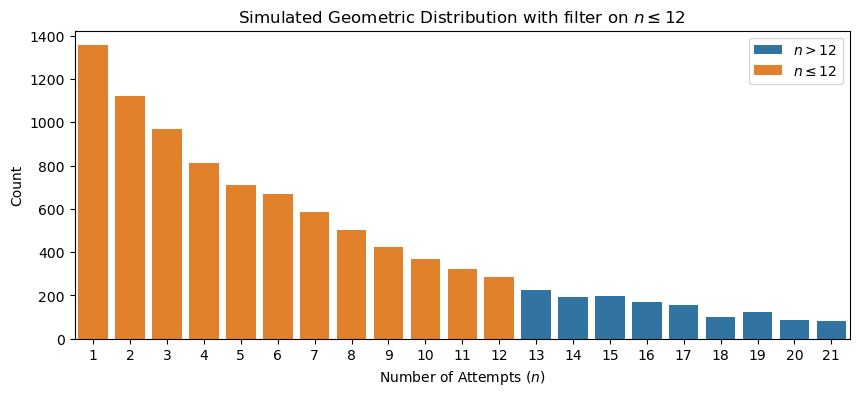

In [16]:
fig, ax = plt.subplots(figsize=(10,4))

# To avoid plotting higher attempts
# You may change the upper bound if desired
filter_mask = geom_results <= ATTEMPT_NUM_CHECK * 2 - 3  

sns.countplot(x=geom_results[filter_mask], hue=geom_is_bound[filter_mask], dodge=False)

ax.set_xlabel('Number of Attempts $(n)$')
ax.set_ylabel('Count')
ax.set_title(f'Simulated Geometric Distribution with filter on $n\leq ${ATTEMPT_NUM_CHECK}')

ax.legend([f'$n>${ATTEMPT_NUM_CHECK}',f'$n\leq${ATTEMPT_NUM_CHECK}'])

plt.show()

### Continuous Random Variables

The following are the common types of continuous distributions and its corresponding `python` simulation model

#### Uniform Distribution

<h3>$$P_x=\frac{1}{b-a}; a\leq x\leq b$$</h3>

In [17]:
NUM_SIMULATIONS = 10000  # The larger, the more accurate the results

LOWER_BOUND = 0          # a
UPPER_BOUND = 1          # b
EX_RAND_NUM = 0.5        # x

In [25]:
uniform_results = np.random.uniform(low=LOWER_BOUND, high=UPPER_BOUND, size=NUM_SIMULATIONS)

In [26]:
uniform_results

array([0.06788929, 0.81764324, 0.25924785, ..., 0.44244441, 0.3580579 ,
       0.79877885])

In [27]:
uniform_is_bound = uniform_results <= EX_RAND_NUM

In [28]:
uniform_is_bound

array([ True, False,  True, ...,  True,  True, False])

In [29]:
uniform_is_bound.mean()

0.5084

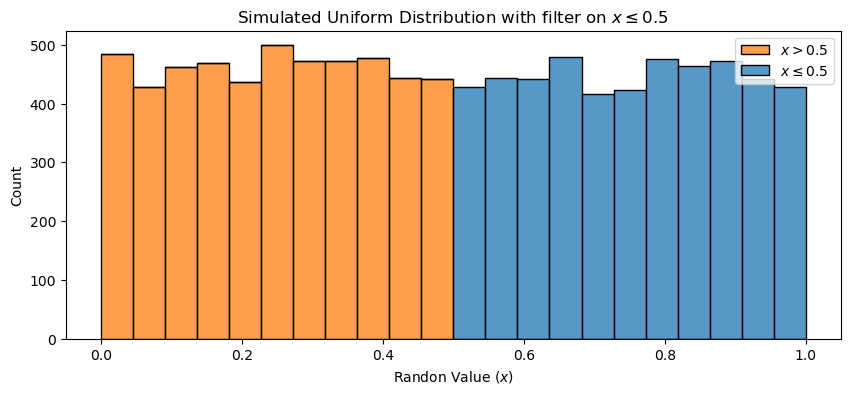

In [30]:
fig, ax = plt.subplots(figsize=(10,4))

sns.histplot(x=uniform_results, hue=uniform_is_bound, multiple='stack')

ax.set_xlabel('Randon Value $(x)$')
ax.set_ylabel('Count')
ax.set_title(f'Simulated Uniform Distribution with filter on $x\leq ${EX_RAND_NUM}')

ax.legend([f'$x>${EX_RAND_NUM}',f'$x\leq${EX_RAND_NUM}'])

#### Normal Distribution

<h2>$$P_x=\frac{1}{\sqrt{\pi}}e^{\frac{-x^2}{2}}; \mu=0, \sigma=1$$</h2>

In [32]:
NUM_SIMULATIONS = 10000  # The larger, the more accurate the results

OBSERVED_ZSCORE = 1.96   # z
SAMPLE_MEAN = 0          # mu
SAMPLE_SIGMA = 1         # SD

In [33]:
normal_results = np.random.normal(loc=SAMPLE_MEAN, scale=SAMPLE_SIGMA, size=NUM_SIMULATIONS)

In [34]:
normal_results

array([ 0.72103948,  1.7255414 ,  1.04068377, ..., -0.91296391,
        1.20215893,  1.9947053 ])

In [35]:
normal_is_bound = normal_results <= OBSERVED_ZSCORE

In [36]:
normal_is_bound

array([ True,  True,  True, ...,  True,  True, False])

In [37]:
normal_is_bound.mean()

0.9762

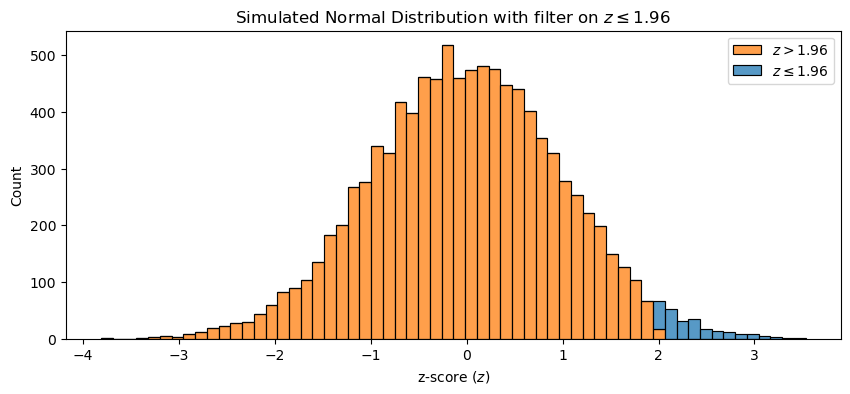

In [38]:
fig, ax = plt.subplots(figsize=(10,4))

sns.histplot(x=normal_results, hue=normal_is_bound, multiple='stack')

ax.set_xlabel('z-score $(z)$')
ax.set_ylabel('Count')
ax.set_title(f'Simulated Normal Distribution with filter on $z\leq ${OBSERVED_ZSCORE}')

ax.legend([f'$z>${OBSERVED_ZSCORE}',f'$z\leq${OBSERVED_ZSCORE}'])

---

<h3><center>END OF FILE</center></h3>

---

**The software is provided "as is", without warranty of any kind, express or implied, including but not limited to the warranties of merchantability, fitness for a particular purpose and noninfringement. in no event shall the authors or copyright holders be liable for any claim, damages or other liability, whether in an action of contract, tort or otherwise, arising from, out of or in connection with the software or the use or other dealings in the software.**